In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Gold.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,1/2/2018
1,1318.375,1318.875,1321.300,1307.710,1/3/2018
2,1313.105,1327.875,1327.875,1306.050,1/4/2018
3,1322.050,1319.590,1323.505,1313.910,1/5/2018
4,1321.050,1320.980,1322.210,1315.105,1/8/2018


In [3]:
df.describe()

,Open,Close,High,Low
count,2115.000000,2115.000000,2115.000000,2115.000000
mean,1674.352721,1713.599972,1706.824433,1687.010801
std,378.566989,282.643783,324.285147,326.719214
min,0.000000,1174.115000,0.000000,0.000000
25%,1458.225000,1480.200000,1478.350000,1461.925000
50%,1782.000000,1787.190000,1794.140000,1775.150000
75%,1913.670000,1914.665000,1922.450000,1902.775000
max,2427.760000,2425.490000,2449.990000,2415.020000


In [4]:
df.loc[0,:]

Open      1302.91
Close      1316.5
High      1318.91
Low      1302.855
Date     1/2/2018
Name: 0, dtype: object

In [5]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)
df

,Open,Close,High,Low,Date
0,1302.910,1316.500,1318.910,1302.855,2018-01-02
1,1318.375,1318.875,1321.300,1307.710,2018-01-03
2,1313.105,1327.875,1327.875,1306.050,2018-01-04
3,1322.050,1319.590,1323.505,1313.910,2018-01-05
4,1321.050,1320.980,1322.210,1315.105,2018-01-08
...,...,...,...,...,...
2110,2352.200,2361.310,2363.460,2340.420,2024-05-28
2111,2361.390,2339.110,2361.790,2335.070,2024-05-29
2112,2338.880,2343.380,2351.090,2323.030,2024-05-30
2113,2343.340,2327.820,2359.580,2320.630,2024-05-31


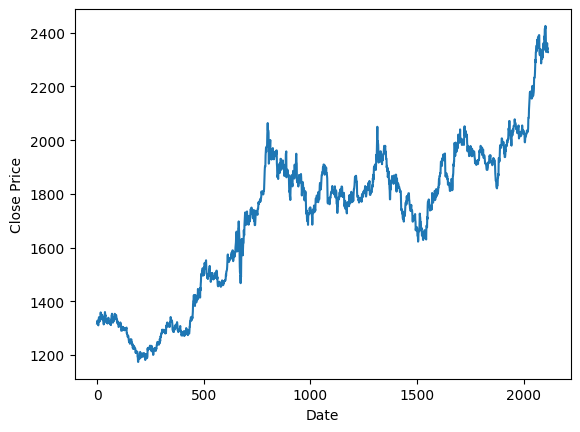

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,1316.500
1,1318.875
2,1327.875
3,1319.590
4,1320.980


In [8]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [10]:
train_data

array([[0.11378284],
       [0.11568075],
       [0.12287284],
       ...,
       [0.51837778],
       [0.51430227],
       [0.51430227]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.51578064, 0.5111857 , 0.53232245, ..., 0.54311058, 0.55589651,
        0.57859155],
       [0.5111857 , 0.53232245, 0.53168315, ..., 0.55589651, 0.57859155,
        0.5764579 ],
       [0.53232245, 0.53168315, 0.52703226, ..., 0.57859155, 0.5764579 ,
        0.5764579 ],
       ...,
       [0.92753571, 0.8884587 , 0.91431825, ..., 0.92695235, 0.94047348,
        0.94871242],
       [0.8884587 , 0.91431825, 0.90266707, ..., 0.94047348, 0.94871242,
        0.93097193],
       [0.91431825, 0.90266707, 0.90171611, ..., 0.94871242, 0.93097193,
        0.93438418]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1238, 30) (1238,)
(815, 30) (815,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
#MSE
test_mse = mean_squared_error(y_test, y_pred)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.04846351620814816
Testing MSE: 0.0011459442179791517
Testing RMSE: 0.03385179785445895


In [18]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_pred

array([1855.50797785, 1860.26887053, 1864.75247605, 1868.8527702 ,
       1872.23637079, 1876.04970301, 1879.28397552, 1880.59470345,
       1881.84466353, 1882.80879271, 1885.84257729, 1892.58568767,
       1897.26279952, 1902.69794871, 1911.19519824, 1920.07845295,
       1932.82714562, 1939.33985509, 1946.27035859, 1952.02429001,
       1956.44926726, 1957.99744361, 1957.14877012, 1957.75919184,
       1960.02924468, 1959.73221489, 1959.48016668, 1961.57163063,
       1962.22155919, 1964.24547325, 1965.98776616, 1966.84749461,
       1968.36143565, 1966.25653329, 1964.10170486, 1963.50404942,
       1963.76632291, 1964.58958314, 1964.48625026, 1966.38894296,
       1967.01338297, 1967.09856852, 1968.06403797, 1970.38762171,
       1970.67535555, 1969.63471756, 1967.85453487, 1968.23853497,
       1969.87340408, 1970.66244267, 1971.7377544 , 1973.4503365 ,
       1976.02231848, 1978.68269798, 1978.03003305, 1978.95151064,
       1979.44897481, 1977.61515303, 1976.29763896, 1974.55081

In [24]:
def predict_future(model, df, predict_days, lags):
    df_predict = df.copy()
    # Convert the index to datetime if it's not already
    if not isinstance(df_predict.index, pd.DatetimeIndex):
        df_predict.index = pd.date_range(start=df_predict.index.min(), periods=len(df_predict))
    for i in range(predict_days):
        new_row = {}
        # Get the last date in the index and add one day
        last_date = df_predict.index[-1]
        date = last_date + pd.DateOffset(days=1)
        # Create a new row with 'Close' as NaN
        new_row['Close'] = np.nan
        # Assign the lagged values from t-1 to t-lags
        for j in range(lags):
            new_row[f'Close_t-{j+1}'] = df_predict['Close'].iloc[-j - 1]
        # Add the new row to the dataframe
        df_predict.loc[date] = new_row
        # Predict the next value
        x_next = df_predict.iloc[-1, 1:].to_frame().T
        y_next = model.predict(x_next)
        df_predict.at[df_predict.index[-1], 'Close'] = y_next[0]
    return df_predict

In [28]:
# Dự đoán 30, 60, 90 ngày tiếp theo
# Lấy predict_data và y_pred_next của 30 ngày
predict_days = 30
df_predict_30 = predict_future(model, df, predict_days, lags)
predict_data_30 = df_predict_30.tail(predict_days)
y_pred_next_30 = predict_data_30['Close']

# Lấy predict_data và y_pred_next của 60 ngày
predict_days = 60
df_predict_60 = predict_future(model, df, predict_days, lags)
predict_data_60 = df_predict_60.tail(predict_days)
y_pred_next_60 = predict_data_60['Close']

# Lấy predict_data và y_pred_next của 90 ngày
predict_days = 90
df_predict_90 = predict_future(model, df, predict_days, lags)
predict_data_90 = df_predict_90.tail(predict_days)
y_pred_next_90 = predict_data_90['Close']


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# Inverse transform the future predictions
y_pred_next_30 = scaler.inverse_transform(np.array(y_pred_next_30).reshape(-1, 1)).flatten()
y_pred_next_60 = scaler.inverse_transform(np.array(y_pred_next_60).reshape(-1, 1)).flatten()
y_pred_next_90 = scaler.inverse_transform(np.array(y_pred_next_90).reshape(-1, 1)).flatten()

In [ ]:
plt.plot(train_data.index, y_train)
plt.plot(test_data.index, y_test)
plt.plot(test_data.index, y_pred)
plt.plot(predict_data_90.index, y_pred_next_90)
plt.plot(predict_data_60.index, y_pred_next_60)
plt.plot(predict_data_30.index, y_pred_next_30)
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()